# Project Proposal

## A Look into Salaries and Remote Work in the Data Science Field

### Ryan Arnouk, Amy Chen, Reuben John, Youssef Saleh

## Introduction

### Background

Monetary compensation is a one of the key factors in employee satisfaction (Card et al., 2012), and studies have shown that working remotely has also positively impacted satisfaction during the pandemic, due to increased autonomy (Galanti et al., 2021).

Based on these two facts, this report aims to provide information regarding salaries and the likelihood of working remotely for each type of job, to people entering the data science job market. This would help them find jobs that match their own hopes and aspirations, as well as create a work environment that is productive in and out of the workplace by influencing work-life balance.

### Guiding Question
> Comparing full-time Data Analysts and Data Engineers, is there a *difference in means* of salaries and *difference in proportions* of remote work?

### Dataset

In this project, we use the dataset, "Data Science Job Salaries", by Ruchi Bhatia (2022) from [Kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries). It contains both qualitative and quantitative observations we can harness, like the year the salary was paid, experience level, employment type, title, salary, remote ratio, company size, and company location.

Together, these variables can help us achieve a more complete picture of the job market in the Data Science field.

## Preliminary Results

### Reading the Data

Kaggle does not allow datasets to be read directly from the website, so we downloaded the data to our repository and read it from there.

In [1]:
library(tidyverse)
library(gridExtra)
library(scales)

# reading the data
salaries <- read.csv("https://raw.githubusercontent.com/ryanarnouk/stat-201-project/main/ds_salaries.csv") %>%
     select(!X) # index column

# preview the data
head(salaries)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
3,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
5,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


### Cleaning and Wrangling Data

This dataset contains a lot of ```job_title``` categories, so let's see which ones we can work with.

In [2]:
# calculating the number of employees in each job title category
salaries %>% 
    filter(employment_type == "FT") %>% # filtering for full-time employees
    group_by(job_title) %>%
    summarise(n = n()) %>%
    arrange(-n) %>% # so most frequent jobs come up first
    head()

job_title,n
<chr>,<int>
Data Scientist,140
Data Engineer,129
Data Analyst,96
Machine Learning Engineer,41
Research Scientist,16
Data Science Manager,12


Here we can see that the first four categories each have more than 30 observations, meaning we can apply the Central Limit Theorem to them.

Let's grab only those categories and store them in a dataframe named ```top_jobs```.

In [3]:
# filtering for full-time employees from categories with n ≥ 30
top_jobs <- salaries %>%
    filter(employment_type == "FT",
           job_title %in% c("Data Scientist", "Data Engineer", "Data Analyst", "Machine Learning Engineer")) %>%
    select(job_title, remote_ratio, salary_in_usd) %>%
    mutate(remote_ratio = recode(remote_ratio, `0` = "in_person", `50` = "hybrid", `100` = "remote")) # more readable

head(top_jobs)

,job_title,remote_ratio,salary_in_usd
,<chr>,<chr>,<int>
1,Data Scientist,in_person,79833
2,Machine Learning Engineer,hybrid,150000
3,Data Analyst,remote,72000
4,Data Scientist,hybrid,35735
5,Data Scientist,in_person,51321
6,Data Scientist,in_person,40481


### Plots

#### Salary distributions

First, let's look at the distributions of salaries in each of the categories by plotting them side-by-side.
We will also add red vertical lines to show their mean salaries.

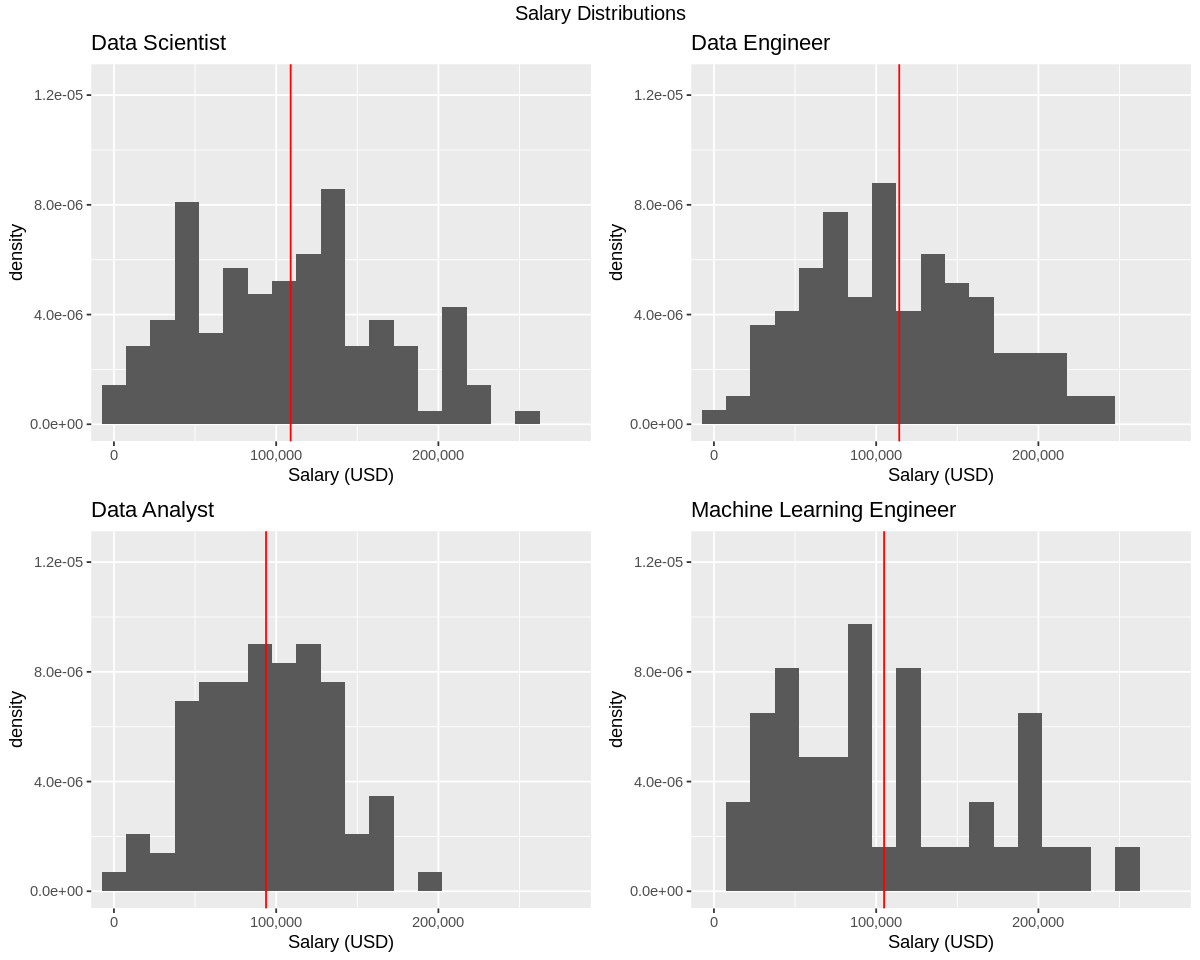

In [4]:
options(repr.plot.width = 10, repr.plot.height = 8) # setting dimensions

dsci_dist <- top_jobs %>% # data scientist distribution
    filter(job_title == "Data Scientist") %>%
    ggplot(aes(x = salary_in_usd, y = ..density..)) +
    geom_histogram(binwidth = 15000) +
    geom_vline(xintercept = mean(filter(top_jobs, job_title == "Data Scientist")$salary_in_usd),
              color = "red") +
    labs(x = "Salary (USD)", title = "Data Scientist") +
    scale_x_continuous(labels = comma) + # so salaries aren't in scientific notation
    coord_cartesian(xlim = c(0, 280000), ylim = c(0, 1.25e-05)) # same width x-axes

deng_dist <- top_jobs %>% # data engineer distribution
    filter(job_title == "Data Engineer") %>%
    ggplot(aes(x = salary_in_usd, y = ..density..)) +
    geom_histogram(binwidth = 15000) +
    geom_vline(xintercept = mean(filter(top_jobs, job_title == "Data Engineer")$salary_in_usd),
              color = "red") +
    labs(x = "Salary (USD)", title = "Data Engineer") +
    scale_x_continuous(labels = comma) +  # so salaries aren't in scientific notation
    coord_cartesian(xlim = c(0, 280000), ylim = c(0, 1.25e-05)) # same width x-axes
                                                                # this cuts off some outlier data

anst_dist <- top_jobs %>% # data analyst distribution
    filter(job_title == "Data Analyst") %>%
    ggplot(aes(x = salary_in_usd, y = ..density..)) +
    geom_histogram(binwidth = 15000) +
    geom_vline(xintercept = mean(filter(top_jobs, job_title == "Data Analyst")$salary_in_usd),
              color = "red") +
    labs(x = "Salary (USD)", title = "Data Analyst") +
    scale_x_continuous(labels = comma) + # so salaries aren't in scientific notation
    coord_cartesian(xlim = c(0, 280000), ylim = c(0, 1.25e-05)) # same width x-axes

mlen_dist <- top_jobs %>% # machine learning engineer distribution
    filter(job_title == "Machine Learning Engineer") %>%
    ggplot(aes(x = salary_in_usd, y = ..density..)) +
    geom_histogram(binwidth = 15000) +
    geom_vline(xintercept = mean(filter(top_jobs, job_title == "Machine Learning Engineer")$salary_in_usd),
              color = "red") +
    labs(x = "Salary (USD)", title = "Machine Learning Engineer") +
    scale_x_continuous(labels = comma) + # so salaries aren't in scientific notation
    coord_cartesian(xlim = c(0, 280000), ylim = c(0, 1.25e-05)) # same width x-axes

grid.arrange(dsci_dist, deng_dist, anst_dist, mlen_dist, ncol = 2, top = "Salary Distributions")

Only the salary distributions of Data Engineers and Data Analysts are roughly unimodal and symmetrical about their means, meaning CLT only applies to them. Therefore, we will exlpore the difference in mean salaries between the two.

Since we are only comparing those two, we can filter for them. We stored this in an object named ```anst_engr_sals```, which we will be working with for the rest of this project.

In [5]:
# filtering for Data Engineers and Data Analysts
anst_engr <- top_jobs %>%
    filter(job_title %in% c("Data Engineer", "Data Analyst"))

head(anst_engr)

,job_title,remote_ratio,salary_in_usd
,<chr>,<chr>,<int>
1,Data Analyst,remote,72000
2,Data Analyst,remote,85000
3,Data Analyst,hybrid,8000
4,Data Engineer,remote,41689
5,Data Engineer,hybrid,47899
6,Data Engineer,in_person,33511


### Estimates

Before testing our hypotheses, we need to have the appropriate point estimates.

In [6]:
anst_engr_est <- anst_engr %>%
    group_by(job_title) %>%
    summarize(n = n(), # number of observations
              mean_salary = mean(salary_in_usd), # mean salary
              sd_salary = sd(salary_in_usd), # standard deviation of salaries
              prop_remote = mean(remote_ratio == "remote")) # proportion of remote work

head(anst_engr_est)

job_title,n,mean_salary,sd_salary,prop_remote
<chr>,<int>,<dbl>,<dbl>,<dbl>
Data Analyst,96,93752.84,39258.60,0.7291667
Data Engineer,129,114224.82,57349.85,0.7131783


**Note**: Although the median is a better estimate for salaries, this project relies on CLT, which dictates that we use the mean instead.

## Methods

### Plan

So far, this report has shown that the mean salaries earned by Data Engineers and Data Analysts are different, as well as their proportion of employees working remotely. We only used representative samples (with n > 30), and have narrowed it down to full-time employees, so that the response variables are truly random and not based on employment type.

Our plots and point estimates are not enough to prove that, because they use only one sample, meaning they are more prone to error compared to a sampling distribution. To remedy this, we could either resample (i.e. bootstrap), or use a theoretical method instead.

Since it is less computationally intensive, and since we picked roughly normally distributed samples, we will use the Central Limit Theorem in this report.

By letting Data Engineers be population 1, and Data Analysts be population 2, we aim to test the following hypotheses:

for the mean salary:
$$H_0 : \mu_2 - \mu_1 = 0$$
$$H_1 : \mu_2 - \mu_1 \neq 0$$

for the proportion of remote work:
$$H_0 : p_2 - p_1 = 0$$
$$H_1 : p_2 - p_1 \neq 0$$

where $\mu$ is the population's mean salary and $p$ is its proportion of employees working remotely. 

We expect to reject both null hypotheses, and will include a 90% confidence interval in our final report.

### Impact

These findings could impact how new data science graduates choose what jobs to apply for, as well as what specific career paths undergraduates may wish to focus on.

### Future

This opens the door for further questions about the difference in experience level, company location and company size when comparing different job titles within the Data Science field. Also, with more data, these questions can be answered for the rest of the jobs that we could not examine due to their sample sizes and distributions.

## References

Card, D., Mas, A., Moretti, E., & Saez, E. (2012). Inequality at work: The effect of peer salaries on job satisfaction. *American Economic Review*, 102(6), 2981–3003. https://doi.org/10.1257/aer.102.6.2981

Galanti, T., Guidetti, G., Mazzei, E., Zappalà, S., & Toscano, F. (2021). Work from home during the COVID-19 outbreak: the impact on employees' remote work productivity, engagement, and stress. *Journal of Occupational and Environmental Medicine*, 63(7), e426–e432. https://doi.org/10.1097/JOM.0000000000002236

Bhatia, R. (2022). *Data science job salaries*. \[Dataset\] https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries